<a href="https://colab.research.google.com/github/RHY2004/Nasa-Space-App-Model/blob/main/NASA_SPACE_APP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## new model to be train for NASA_SPACE_APP
## First we will import all the importent Library's


In [1]:
# Data manipulation and processing
import pandas as pd
import numpy as np

# Data preprocessing and splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# For cross-validation
from sklearn.model_selection import GridSearchCV


## Uploding the CSV file

In [2]:
from google.colab import files
import pandas as pd
from IPython.display import display

uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
display(df)

Saving orbits.csv to orbits.csv


,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,(2017 CX1),Apollo Asteroid,57800,1.4096,0.2946,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21
15631,(2017 CO5),Amor Asteroid,57789,2.2612,0.4429,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04
15632,(2017 CP5),Amor Asteroid,57800,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74
15633,(2017 CR5),Apollo Asteroid,57793,1.8815,0.4646,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95


In [3]:
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['Object Name', 'Object Classification', 'Epoch (TDB)',
       'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)',
       'Perihelion Argument (deg)', 'Node Longitude (deg)',
       'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
       'Aphelion Distance (AU)', 'Orbital Period (yr)',
       'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference',
       'Asteroid Magnitude'],
      dtype='object')


In [4]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Get dataset information
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
    Object Name Object Classification  Epoch (TDB)  Orbit Axis (AU)  \
0      433 Eros         Amor Asteroid        57800           1.4579   
1    719 Albert         Amor Asteroid        57800           2.6385   
2    887 Alinda         Amor Asteroid        57800           2.4787   
3  1036 Ganymed         Amor Asteroid        57800           2.6628   
4     1221 Amor         Amor Asteroid        57800           1.9191   

   Orbit Eccentricity  Orbit Inclination (deg)  Perihelion Argument (deg)  \
0              0.2226                  10.8277                   178.8050   
1              0.5479                  11.5822                   156.1409   
2              0.5671                   9.3561                   350.3482   
3              0.5338                  26.6929                   132.4690   
4              0.4356                  11.8795                    26.6572   

   Node Longitude (deg)  Mean Anomoly (deg)  Perihelion Distance (AU)  \
0       

In [5]:
# Fill missing values in 'Asteroid Magnitude' with the column mean
df['Asteroid Magnitude'].fillna(df['Asteroid Magnitude'].mean(), inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())


Object Name                                 0
Object Classification                       0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          0
dtype: int64


<ipython-input-5-c411c9a48d5c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Asteroid Magnitude'].fillna(df['Asteroid Magnitude'].mean(), inplace=True)


In [6]:
# Select the features for the model
features = ['Orbit Axis (AU)', 'Orbit Eccentricity', 'Perihelion Distance (AU)',
            'Aphelion Distance (AU)', 'Minimum Orbit Intersection Distance (AU)',
            'Asteroid Magnitude']

X = df[features]

# For demonstration purposes, let's create a hypothetical binary target
# For instance, if the 'Minimum Orbit Intersection Distance (AU)' is less than 0.05, we assume a hit
y = (df['Minimum Orbit Intersection Distance (AU)'] < 0.05).astype(int)

print(X.head())
print(y.head())

   Orbit Axis (AU)  Orbit Eccentricity  Perihelion Distance (AU)  \
0           1.4579              0.2226                    1.1335   
1           2.6385              0.5479                    1.1928   
2           2.4787              0.5671                    1.0731   
3           2.6628              0.5338                    1.2413   
4           1.9191              0.4356                    1.0832   

   Aphelion Distance (AU)  Minimum Orbit Intersection Distance (AU)  \
0                    1.78                                    0.1492   
1                    4.08                                    0.2004   
2                    3.88                                    0.0925   
3                    4.08                                    0.3421   
4                    2.76                                    0.1068   

   Asteroid Magnitude  
0               11.16  
1               15.50  
2               13.40  
3                9.45  
4               17.70  
0    0
1    0
2    0

## Spliting the Data-set for traning

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (10944, 6)
Testing set size: (4691, 6)


In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

## Evaluateing the model Accuracy

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

##Evaluate the Model
##Check how well the model is doing using accuracy, precision, recall, etc.

Accuracy: 0.95
Precision: 0.92
Recall: 0.98
F1 Score: 0.95


In [11]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


In [12]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[2608    0]
 [   0 2083]]


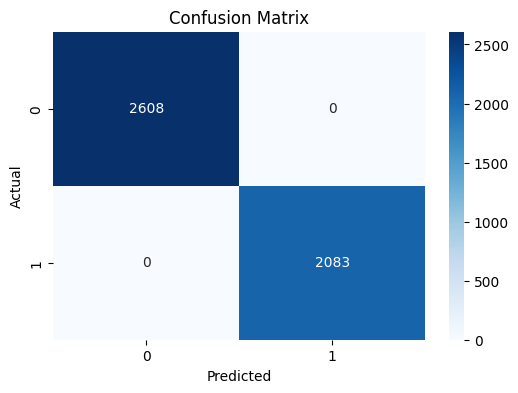


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2608
           1       1.00      1.00      1.00      2083

    accuracy                           1.00      4691
   macro avg       1.00      1.00      1.00      4691
weighted avg       1.00      1.00      1.00      4691

AUC-ROC Score: 1.0000


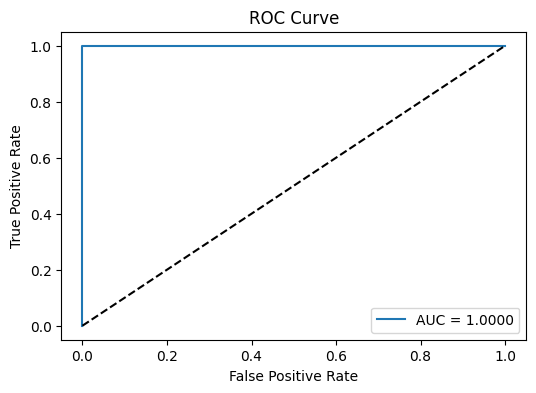

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = rf.predict(X_test_scaled)

# Predict probabilities for ROC-AUC
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {auc_roc:.4f}")

# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.4f}')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Evaluation of the Best Model:
[[2608    0]
 [   0 2083]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2608
           1       1.00      1.00      1.00      2083

    accuracy                           1.00      4691
   macro avg       1.00      1.00      1.00      4691
weighted avg       1.00      1.00      1.00      4691

AUC-ROC Score: 1.0000


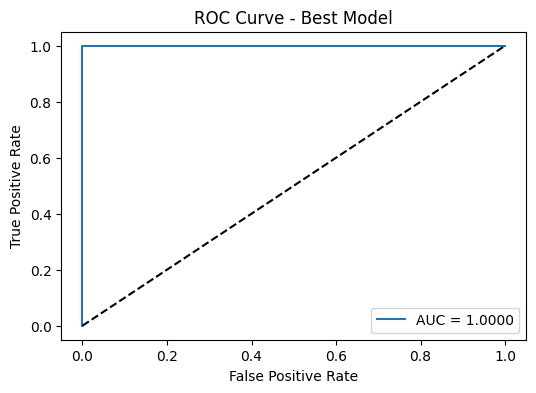

In [16]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=2,
    scoring='roc_auc'
)

# Fit Grid Search to the training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters from Grid Search
print(f"Best Parameters: {grid_search.best_params_}")

# Best estimator
best_rf = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_rf.predict(X_test_scaled)
y_proba_best = best_rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the best model
print("\nEvaluation of the Best Model:")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba_best):.4f}")

# ROC Curve for the best model
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(6,4))
plt.plot(fpr_best, tpr_best, label=f'AUC = {roc_auc_score(y_test, y_proba_best):.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Model')
plt.legend(loc='lower right')
plt.show()


In [18]:
# Perform 5-fold cross-validation on the best model
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='roc_auc')

print(f"Cross-validated AUC-ROC scores: {cv_scores}")
print(f"Mean AUC-ROC: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-validated AUC-ROC scores: [1. 1. 1. 1. 1.]
Mean AUC-ROC: 1.0000
Standard Deviation: 0.0000


                                    Feature  Importance
4  Minimum Orbit Intersection Distance (AU)    0.757992
2                  Perihelion Distance (AU)    0.134419
5                        Asteroid Magnitude    0.083297
0                           Orbit Axis (AU)    0.011922
3                    Aphelion Distance (AU)    0.006234
1                        Orbit Eccentricity    0.006135


<ipython-input-19-b433dc7785c0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

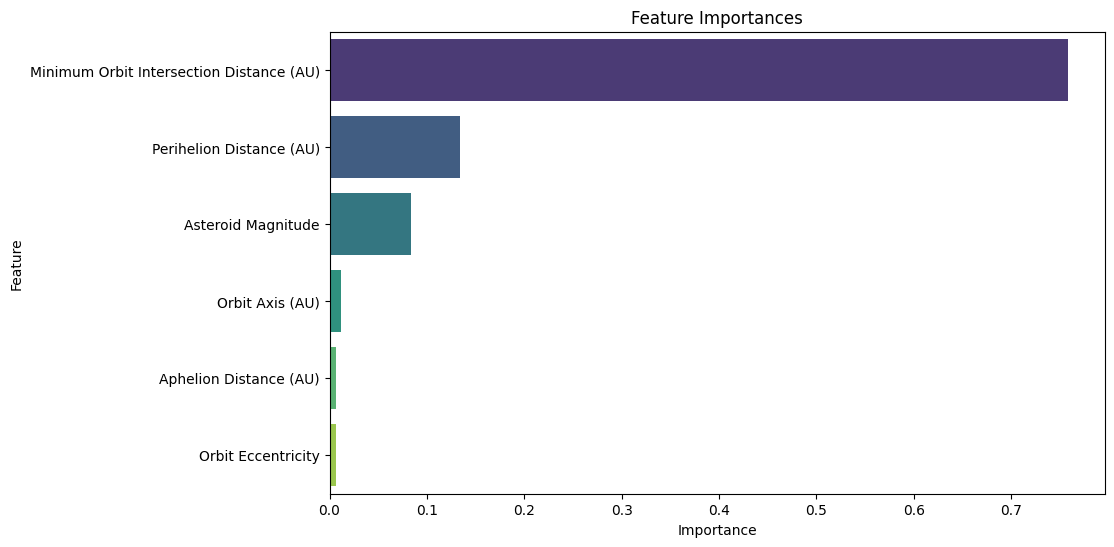

In [19]:
# Get feature importances
importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importances)

# Visualize Feature Importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [20]:
import joblib

# Save the model to a file
joblib.dump(best_rf, 'best_random_forest_model.joblib')

# Download the model (if using direct upload)
from google.colab import files
files.download('best_random_forest_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# Example: Using class weights in Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [23]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


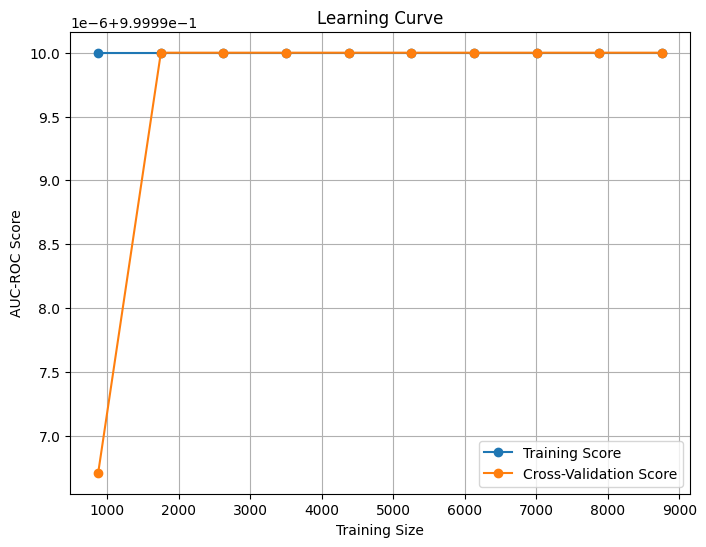

In [24]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train_scaled, y_train, cv=5, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('AUC-ROC Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [29]:
def predict_asteroid_impact(orbit_axis, orbit_eccentricity, perihelion_distance, aphelion_distance, min_orbit_intersection_distance, asteroid_magnitude):
    # Create a DataFrame from the input, including all necessary features
    user_input = pd.DataFrame({
        'Orbit Axis (AU)': [orbit_axis],
        'Orbit Eccentricity': [orbit_eccentricity],
        'Perihelion Distance (AU)': [perihelion_distance],
        'Aphelion Distance (AU)': [aphelion_distance],
        'Minimum Orbit Intersection Distance (AU)': [min_orbit_intersection_distance],
        'Asteroid Magnitude': [asteroid_magnitude]  # Include the missing feature
    })

    # Scale the input
    user_input_scaled = scaler.transform(user_input)  # Ensure 'scaler' is the one used earlier

    # Make a prediction
    prediction = best_rf.predict(user_input_scaled)  # Use your trained model here
    prediction_proba = best_rf.predict_proba(user_input_scaled)

    # Output the result
    if prediction[0] == 1:
        print("The model predicts: **Impact Possible**")
        print(f"Probability of impact: {prediction_proba[0][1]:.2f}")
    else:
        print("The model predicts: **No Impact**")
        print(f"Probability of impact: {prediction_proba[0][0]:.2f}")

# Get user input
orbit_axis = float(input("Enter Orbit Axis (AU): "))
orbit_eccentricity = float(input("Enter Orbit Eccentricity: "))
perihelion_distance = float(input("Enter Perihelion Distance (AU): "))
aphelion_distance = float(input("Enter Aphelion Distance (AU): "))
min_orbit_intersection_distance = float(input("Enter Minimum Orbit Intersection Distance (AU): "))
asteroid_magnitude = float(input("Enter Asteroid Magnitude: "))

# Call the function with user input
predict_asteroid_impact(orbit_axis, orbit_eccentricity, perihelion_distance, aphelion_distance, min_orbit_intersection_distance, asteroid_magnitude)


Enter Orbit Axis (AU): 2.5
Enter Orbit Eccentricity: 0.15
Enter Perihelion Distance (AU): 2.125
Enter Aphelion Distance (AU): 1.7
Enter Minimum Orbit Intersection Distance (AU): 0.001
Enter Asteroid Magnitude: 20.9
The model predicts: **Impact Possible**
Probability of impact: 0.91


In [30]:
import joblib
joblib.dump(best_rf, 'asteroid_model.pkl')


['asteroid_model.pkl']

In [31]:
from google.colab import files
files.download('asteroid_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# Assuming you've already created and fitted the scaler
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler


['scaler.pkl']

In [35]:
from google.colab import files

files.download('asteroid_model.pkl')  # Download model
files.download('scaler.pkl')           # Download scaler


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# Load the model and scaler
model = joblib.load('asteroid_model.pkl')  # Make sure this file is in the same directory as your backend code
scaler = joblib.load('scaler.pkl')          # Ensure this file is also present
